In [1]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import folium
import pickle
import pandas as pd

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
params = {
    'query_text': 'maps',
    '$limit': 50000}#,
#     'year': 2015
# }

In [4]:
response = requests.get(endpoint, params = params)

In [5]:
response

<Response [200]>

In [6]:
res = response.json()

In [7]:
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [8]:
type(res)

list

In [9]:
# maps_query = []
# for item in res.items():
#     try:
#         maps_query.append(item['month_name','year','query_count','query_text'])
#     except (TypeError, KeyError):
#         print(item)

In [10]:
# maps_df = pd.read_json(res)

In [11]:
maps_df = pd.DataFrame(res)

In [12]:
maps_df.head()

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN


In [13]:
maps_df.shape

(79, 5)

In [14]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   79 non-null     object
 1   year         79 non-null     object
 2   query_count  79 non-null     object
 3   query_text   79 non-null     object
 4   month        22 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [15]:
maps_df['query_count'] = maps_df['query_count'].astype(int)

In [16]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   79 non-null     object
 1   year         79 non-null     object
 2   query_count  79 non-null     int64 
 3   query_text   79 non-null     object
 4   month        22 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.2+ KB


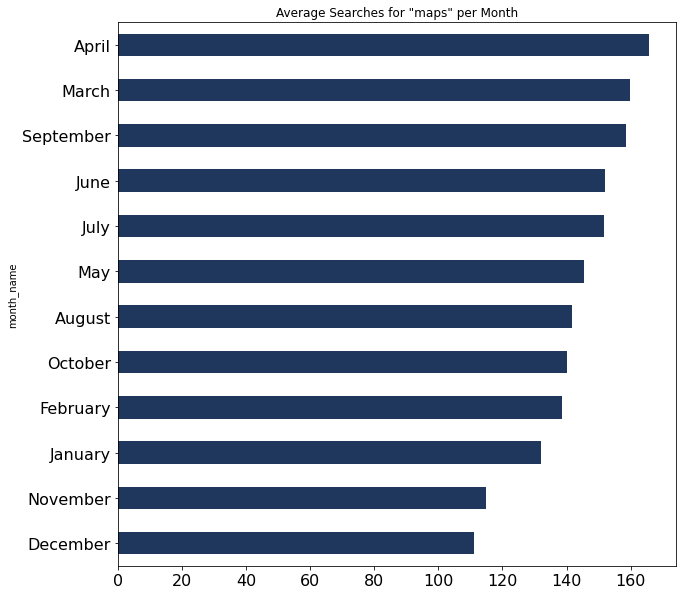

In [17]:
maps_df.groupby('month_name')['query_count'].mean().sort_values()\
.plot(kind='barh', figsize=(10,10),color = '#1F375D', fontsize = '16', title = 'Average Searches for "maps" per Month');

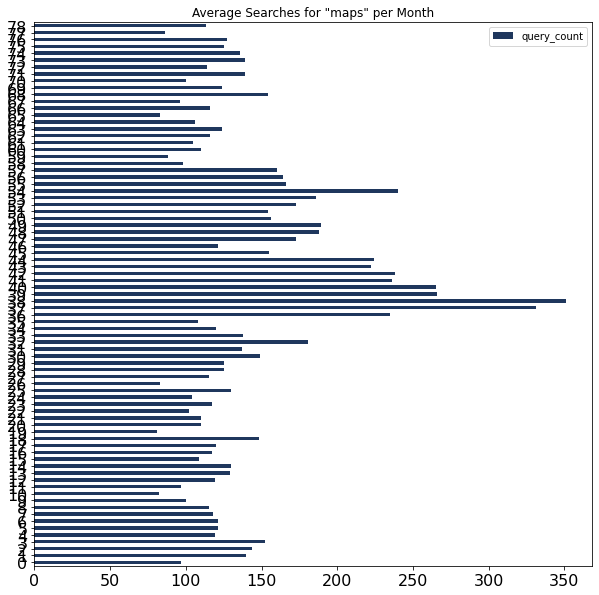

In [18]:
maps_df.plot(kind='barh', figsize=(10,10),color = '#1F375D', fontsize = '16', title = 'Average Searches for "maps" per Month');

### 2. 2016 'fire' >100 querys in a month. How many months did this occur?

In [19]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [20]:
params2 = {
    'query_text': 'fire',
    '$limit': 50000,
    'year': 2016,
    '$where' : 'query_count > 0'
}

In [21]:
response2 = requests.get(endpoint2, params = params2)

In [22]:
response2

<Response [200]>

In [23]:
response2.url

'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&%24limit=50000&year=2016&%24where=query_count+%3E+0'

In [24]:
res2 = response2.json()

In [25]:
res2

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [26]:
type(res2)

list

In [27]:
maps2_df = pd.DataFrame(res2)

In [28]:
maps2_df['query_count'] = maps2_df['query_count'].astype(int)

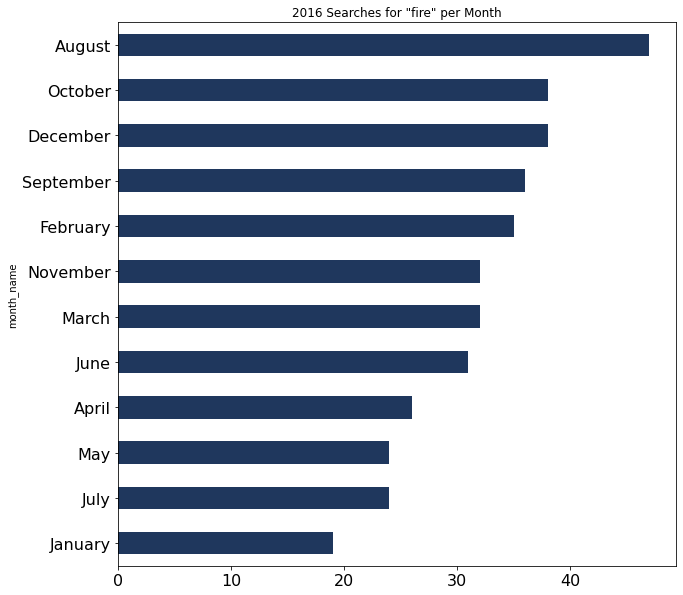

In [29]:
maps2_df.groupby('month_name')['query_count'].mean().sort_values()\
.plot(kind='barh', figsize=(10,10),color = '#1F375D', fontsize = '16', title = '2016 Searches for "fire" per Month');

### 3. All queries >100/month? How many times occurred?

In [30]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [31]:
params3 = {
    #'query_text': 'fire',
    '$limit': 50000,
    #'year': 2016,
    '$where' : 'query_count > 100'
}

In [32]:
response3 = requests.get(endpoint3, params = params3)

In [33]:
response3

<Response [200]>

In [34]:
response3.url

'https://data.nashville.gov/resource/fuaa-r5cm.json?%24limit=50000&%24where=query_count+%3E+100'

In [35]:
res3 = response3.json()

In [36]:
res3

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [37]:
type(res3)

list

In [38]:
maps3_df = pd.DataFrame(res3)

In [39]:
maps3_df['query_count'] = maps3_df['query_count'].astype(int)

In [40]:
maps3_df['month_name'].count()

1161

In [41]:
# maps3_df.groupby('month_name')['query_count'].mean().sort_values()\
# .plot(kind='barh', figsize=(10,10),color = '#1F375D', fontsize = '16', title = '2016 Searches for "fire" per Month');

### 4. "Codes" searched >100/month? How many times?

In [42]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [43]:
params4 = {
    'query_text': 'codes',
    '$limit': 50000,
    #'year': 2016,
    '$where' : 'query_count > 100'
}

In [44]:
response4 = requests.get(endpoint4, params = params4)

In [45]:
response4

<Response [200]>

In [46]:
response4.url

'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&%24limit=50000&%24where=query_count+%3E+100'

In [47]:
res4 = response4.json()

In [48]:
res4

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2015',
  'query_count': '117',
  'query_text': 'codes'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '121',
  'query_text': 'codes'},
 {'month_name': 'February',
  'month': '2',
  'year': '2019',
  'query_count': '124',
  'query_text': 'codes'},
 {'month_name': 'Ju

In [49]:
type(res4)

list

In [50]:
maps4_df = pd.DataFrame(res4)

In [51]:
maps4_df['query_count'] = maps4_df['query_count'].astype(int)

In [52]:
maps4_df['month_name'].count()

51

In [53]:
# maps4_df.groupby('month_name')['query_count'].mean().sort_values()\
# .plot(kind='barh', figsize=(10,10),color = '#1F375D', fontsize = '16', title = '2016 Searches for "fire" per Month');

### 5. API request from hubNashville (311) Service Request
    -Compare to top 500 monthly searches
    -What do you observe? (open ended)

In [54]:
%%time
# Start with an empty list to add to from each page request
results_311 = []

# Loop through from pages 1 to 13. Pages found by: total rows / limit = # pages
for page_num in range(1, 14):
    # URL endpoint
    url = 'https://data.nashville.gov/resource/7qhx-rexh.json'
    # Multi page therefore utilize limit and offset to keep tract of adding new data to list
    params = {'$limit': 50000, '$offset':((page_num-1)*50000)}
    # Request the information from the website and use specified parameters
    response = requests.get(url, params)
    # Convert request to json type
    data = response.json()
    # Add new results to previous results in specified list
    results_311.extend(data)


print("We have", len(results_311), "total results")

We have 628205 total results
CPU times: user 8.07 s, sys: 986 ms, total: 9.06 s
Wall time: 37.3 s


In [55]:
# Convert list/json to dataframe
df311 = pd.DataFrame(results_311)

In [56]:
# Expect (628205 rows, 21 columns)
df311.shape

(628205, 33)

In [57]:
df311.head(3)

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,:@computed_region_s8bq_67w7,:@computed_region_v67z_xm3t,:@computed_region_kh5x_g7w5,:@computed_region_cfa7_hbpz,:@computed_region_sjpq_96s8,:@computed_region_gisn_y5cm,:@computed_region_b9k3_hpc2,oem_id,parent_case,contact_type
0,198180,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2019-06-11T18:15:39.000,2019-06-11T18:15:39.000,Phone,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197727,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2019-06-10T21:24:14.000,2019-06-10T21:24:14.000,Phone,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197987,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2019-06-11T15:06:56.000,2019-06-11T15:06:56.000,Phone,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628205 entries, 0 to 628204
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  628205 non-null  object
 1   status                       628205 non-null  object
 2   case_request                 627853 non-null  object
 3   case_subrequest              624679 non-null  object
 4   additional_subrequest        618540 non-null  object
 5   date_time_opened             628205 non-null  object
 6   date_time_closed             615308 non-null  object
 7   case_origin                  628205 non-null  object
 8   state_issue                  628205 non-null  object
 9   closed_when_created          628205 non-null  object
 10  incident_address             430741 non-null  object
 11  incident_city                423132 non-null  object
 12  incident_council_district    423026 non-null  object
 13  incident_zip_c

In [59]:
df311.drop([':@computed_region_wvby_4s8j',\
            ':@computed_region_3aw5_2wv7',\
            ':@computed_region_p6sk_2acq',\
            ':@computed_region_gxvr_9jxz',\
            ':@computed_region_yf9r_ed6g',\
            ':@computed_region_fvtq_wnma',\
            ':@computed_region_s8bq_67w7',\
            ':@computed_region_v67z_xm3t',\
            ':@computed_region_kh5x_g7w5',\
            ':@computed_region_cfa7_hbpz',\
            ':@computed_region_sjpq_96s8',\
            ':@computed_region_gisn_y5cm',\
            ':@computed_region_b9k3_hpc2'], axis=1, inplace=True)

In [60]:
df311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628205 entries, 0 to 628204
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   case_number                628205 non-null  object
 1   status                     628205 non-null  object
 2   case_request               627853 non-null  object
 3   case_subrequest            624679 non-null  object
 4   additional_subrequest      618540 non-null  object
 5   date_time_opened           628205 non-null  object
 6   date_time_closed           615308 non-null  object
 7   case_origin                628205 non-null  object
 8   state_issue                628205 non-null  object
 9   closed_when_created        628205 non-null  object
 10  incident_address           430741 non-null  object
 11  incident_city              423132 non-null  object
 12  incident_council_district  423026 non-null  object
 13  incident_zip_code          422955 non-null  

In [61]:
df311.drop(['oem_id','parent_case','contact_type'], axis=1, inplace=True)

In [62]:
df311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628205 entries, 0 to 628204
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   case_number                628205 non-null  object
 1   status                     628205 non-null  object
 2   case_request               627853 non-null  object
 3   case_subrequest            624679 non-null  object
 4   additional_subrequest      618540 non-null  object
 5   date_time_opened           628205 non-null  object
 6   date_time_closed           615308 non-null  object
 7   case_origin                628205 non-null  object
 8   state_issue                628205 non-null  object
 9   closed_when_created        628205 non-null  object
 10  incident_address           430741 non-null  object
 11  incident_city              423132 non-null  object
 12  incident_council_district  423026 non-null  object
 13  incident_zip_code          422955 non-null  

In [63]:
df311.tail()

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location
628200,617436,In Progress,"Streets, Roads & Sidewalks",Overgrowth on right of way,Roadway,2021-03-10T12:45:28.000,NaN,hubNashville Community,False,False,Shaw Rd,GOODLETTSVILLE,3,37072,36.3076546,-86.79423690000002,"{'latitude': '36.3076546', 'longitude': '-86.7..."
628201,616467,In Progress,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2021-03-09T17:55:44.000,NaN,Mobile App,False,False,29 S 6th St,NASHVILLE,6,37206,36.16564149891778,-86.75869323313236,"{'latitude': '36.16564149891778', 'longitude':..."
628202,613558,In Progress,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2021-03-07T20:40:32.000,NaN,hubNashville Community,False,False,2829 Lakeland Dr,NASHVILLE,15,37214,36.15421445532484,-86.66181614235826,"{'latitude': '36.15421445532484', 'longitude':..."
628203,615675,In Progress,"Trash, Recycling & Litter",Cart Service,Trash - Report a Stolen Cart,2021-03-09T13:29:01.000,NaN,hubNashville Community,False,False,800 W Greenwood Ave,NASHVILLE,5,37206,36.1915837,-86.756064,"{'latitude': '36.1915837', 'longitude': '-86.7..."
628204,613665,In Progress,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2021-03-08T03:08:59.000,NaN,hubNashville Community,False,False,816 Sandworth Cove,ANTIOCH,32,37013,36.0466588,-86.6175055,"{'latitude': '36.0466588', 'longitude': '-86.6..."


In [64]:
df311.drop(['mapped_location'], axis=1, inplace=True)

In [65]:
df311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628205 entries, 0 to 628204
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   case_number                628205 non-null  object
 1   status                     628205 non-null  object
 2   case_request               627853 non-null  object
 3   case_subrequest            624679 non-null  object
 4   additional_subrequest      618540 non-null  object
 5   date_time_opened           628205 non-null  object
 6   date_time_closed           615308 non-null  object
 7   case_origin                628205 non-null  object
 8   state_issue                628205 non-null  object
 9   closed_when_created        628205 non-null  object
 10  incident_address           430741 non-null  object
 11  incident_city              423132 non-null  object
 12  incident_council_district  423026 non-null  object
 13  incident_zip_code          422955 non-null  

In [66]:
df311.groupby('incident_zip_code')['status'].size().sort_values()\
# .plot(kind='barh', figsize=(10,14),color = '#1F375D', fontsize = '12',\
#       title = 'Request Status by Council Districts');

incident_zip_code
37067         1
37087         1
37130         1
38506         1
372515        1
37040         1
37129         1
37363         1
37663         1
38011         1
38401         1
37036         1
37066         2
37090         2
37073         2
37172         2
37160         2
37152         2
TN            3
0             5
37075         5
00000        16
37232        27
37246        28
37240        38
37064        39
37122        90
37143       150
37015       218
37086       258
37135       289
37228       821
37213      1124
37080      1366
37189      2093
37072      2917
37220      3838
37201      3919
37138      4178
37027      5122
37219      5348
37221      7552
37076      8957
37218     11935
37212     12171
37204     12326
37210     15023
37216     15841
37215     16083
37217     16954
37205     18283
37203     18665
37214     20189
37115     21073
37208     25201
37207     28278
37206     28971
37209     35581
37211     37644
37013     40312
Name: status, dtype: i

In [67]:
zip_list = ['37013','37211','37209','37206','37207','37208','37115','37214','37205','37203']
df311_boolean_series = df311['incident_zip_code'].isin(zip_list)
df311_top_ten = df311[df311_boolean_series]

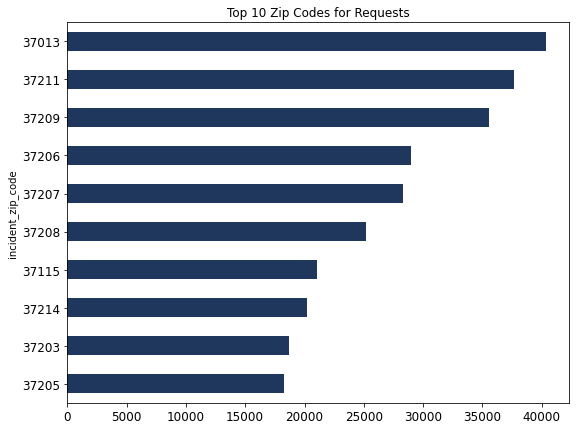

In [68]:
df311_top_ten.groupby('incident_zip_code')['status'].size().sort_values()\
.plot(kind='barh', figsize=(9,7), color ='#1F375D', fontsize='12',\
title='Top 10 Zip Codes for Requests');

### 6. Find 2 new datasets, make API requests, and do an analysis after combining data.

In [69]:
mnps = pd.read_excel('../data/MNPS Enrollment Data 121219.xls')

In [70]:
mnps.head(2)

,School Year,School Level,School ID,School Name,State School ID,Zip Code,Total Enrollment,Grade PreK 3yrs,Grade PreK 4yrs,Grade K,...,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,White,Male,Female,Economically Disadvantaged,Students with Disabilities,Limited English Proficiency,DataAsOf
0,19-20,Elementary School,496,A. Z. Kelley Elementary,1,37013,849,NaN,< 5%,18%,...,37%,24%,< 10,25%,51%,49%,31%,9%,35%,12/12/2019
1,19-20,Elementary School,375,Alex Green Elementary,5,37189,236,< 10,15%,18%,...,78%,12%,< 10,10%,49%,51%,66%,10%,11%,12/12/2019


In [71]:
endpoint6 = 'https://data.nashville.gov/resource/797j-5xh2.json'
params6 = {
    #'query_text': 'fire',
    '$limit': 50000#,
    #'year': 2016,
    #'$where' : 'query_count > 100'
}
response6 = requests.get(endpoint6, params = params6)
response6

<Response [200]>

In [72]:
response6.url

'https://data.nashville.gov/resource/797j-5xh2.json?%24limit=50000'

In [73]:
res6 = response6.json()

In [74]:
res6

[{'organization_name': 'Metro Social Services',
  'organization_type': 'Congregated Meals Site',
  'building': 'Old Hickory Towers',
  'address': '930 Industrial Blouvard',
  'city': 'Old Hickory ',
  'state': 'Tennessee',
  'zip_code': '37138',
  'phone_number': '615-601-7691',
  'contact': 'Site Coordinator',
  'monday_opening_time': '9:00 AM',
  'monday_closing_time': '1:30 PM',
  'tuesday_opening_time': '9:00 AM',
  'tuesday_closing_time': '1:30 PM',
  'wednesday_opening_time': '9:00 AM',
  'wednesday_closing_time': '1:30 PM',
  'thursday_opening_time': '9:00 AM',
  'thursday_closing_time': '1:30 PM',
  'friday_opening_time': '9:00 AM',
  'friday_closing_time': '1:30 PM',
  'saturday_opening_time': 'Closed',
  'saturday_closing_time': 'Closed',
  'sunday_opening_time': 'Closed',
  'sunday_closing_time': 'Closed',
  'information_and_referral': 'No',
  'counseling': 'No',
  'case_management': 'No',
  'life_management_skills': 'No',
  'homeless_services': 'No',
  'senior_nutirition': 

In [75]:
type(res6)

list

In [76]:
maps6_df = pd.DataFrame(res6)

In [77]:
maps6_df.head(2)

,organization_name,organization_type,building,address,city,state,zip_code,phone_number,contact,monday_opening_time,...,senior_adult_meals,social_activies_fun_fitness_fellowship,mapped_location,:@computed_region_f73m_vb2k,:@computed_region_cfa7_hbpz,:@computed_region_gisn_y5cm,:@computed_region_v3ji_vzam,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,notes
0,Metro Social Services,Congregated Meals Site,Old Hickory Towers,930 Industrial Blouvard,Old Hickory,Tennessee,37138,615-601-7691,Site Coordinator,9:00 AM,...,Yes,Yes,"{'human_address': '{""address"": ""930 Industrial...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Metro Social Services,Congregated Meals Site,East Park Community Center,600 Woodland St,Nashville,Tennessee,37206,615-601-7688,Site Coordinator,9:00 AM,...,Yes,Yes,"{'latitude': '36.173412', 'longitude': '-86.76...",7,16,2,2005,7,15548,NaN


In [78]:
#maps6_df['query_count'] = maps6_df['query_count'].astype(int)

In [79]:
ss_zips = maps6_df['zip_code'].value_counts()

In [80]:
ss_zips = pd.DataFrame(ss_zips)
type(ss_zips)

pandas.core.frame.DataFrame

In [81]:
# maps6_df.groupby('month_name')['query_count'].mean().sort_values()\
# .plot(kind='barh', figsize=(10,10),color = '#1F375D', fontsize = '16',\
#title = '2016 Searches for "fire" per Month');